In [1]:
# import neccesery modules
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import joblib
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [ ]:
# loading dataset
data=pd.read_csv('oil_spill.csv')

In [3]:
# load first five record
data.head(5)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [4]:
# load last five record
data.tail(5)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0
936,204,11,7.73,235.73,135,89100,61.82,12.24,831.0,0.20,...,254.56,254.56,127.28,180.00,2.00,0,3782.68,65.65,6.26,0


In [5]:
# get shape of array
data.shape

(937, 50)

In [6]:
# get basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

In [7]:
# check null value
data.isna().sum()


f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

In [8]:
# find corelation of datas and plot
cor=data.corr()
styled_corr = cor.style.background_gradient(cmap='Blues')
styled_corr

c:\Users\prane\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\prane\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
f_1,1.000000,-0.155581,0.172017,-0.104116,-0.017025,-0.169533,-0.037412,-0.204983,-0.244551,-0.214447,-0.261624,-0.209190,-0.222342,-0.220721,-0.137901,-0.178220,0.056430,0.027526,0.038746,-0.159138,-0.170053,-0.240241,nan,0.026409,-0.260500,0.397330,0.404138,-0.173291,-0.158883,0.237770,0.035824,-0.094846,-0.036654,-0.091356,-0.225343,-0.216387,0.281274,-0.260929,-0.452966,-0.499695,-0.286190,-0.167466,-0.156916,-0.141792,-0.139478,-0.163693,-0.202983,0.294422,-0.253698,-0.180531
f_2,-0.155581,1.000000,0.058390,0.052638,-0.036870,0.953947,-0.136761,-0.016822,0.829978,0.128465,0.745590,0.004035,0.020195,0.176080,-0.118317,0.235500,0.237388,0.321276,0.022253,-0.053111,-0.057095,0.140805,nan,-0.142899,0.131439,-0.088328,-0.013225,0.091962,0.170798,-0.163065,0.005472,0.118776,-0.009433,0.118634,0.869227,0.873996,-0.148739,0.443913,0.080779,0.071089,0.555154,0.777807,0.800939,0.716496,-0.080879,-0.048315,0.118792,-0.128222,0.139417,0.034128
f_3,0.172017,0.058390,1.000000,0.549510,-0.082764,0.050795,-0.627934,-0.349541,0.158686,0.073794,-0.064076,-0.081738,0.042723,0.299324,-0.301641,0.439603,-0.003753,-0.046857,0.599107,-0.193047,-0.033185,0.299426,nan,-0.669548,0.059858,-0.013191,0.627137,-0.119572,0.012991,-0.368946,-0.097925,0.585351,-0.061054,0.585760,0.178255,0.177423,0.246582,0.332342,-0.279094,-0.165125,0.186920,0.178287,0.129653,0.176883,-0.088310,-0.182458,-0.022098,0.048291,0.162600,-0.035221
f_4,-0.104116,0.052638,0.549510,1.000000,0.048847,0.024693,-0.546205,-0.222063,0.097683,0.202167,-0.082742,0.106767,0.224342,0.335270,-0.039329,0.372116,-0.000815,-0.020119,0.494286,-0.011078,0.132370,0.615556,nan,-0.667478,0.466752,-0.503382,0.115749,0.113152,0.167272,-0.551173,-0.358789,0.686419,-0.064612,0.686369,0.151832,0.147977,0.284814,0.262117,0.282325,0.344152,-0.046934,0.032402,0.022234,0.000664,-0.220461,-0.204776,0.106758,-0.394081,0.476127,-0.050489
f_5,-0.017025,-0.036870,-0.082764,0.048847,1.000000,-0.028431,0.059128,0.123814,-0.047879,0.098573,-0.075843,0.009470,0.013574,-0.016254,0.028305,-0.029425,0.045836,0.065762,-0.065304,0.048283,0.032183,0.122604,nan,0.001713,0.130162,-0.109169,-0.110526,0.138419,0.045215,-0.094680,-0.175452,0.062919,0.044074,0.059118,-0.044723,-0.039225,0.100720,-0.006470,0.204627,0.232303,-0.066930,-0.014877,-0.013742,-0.012346,-0.076695,-0.080136,0.070070,-0.135294,0.116896,-0.078598
f_6,-0.169533,0.953947,0.050795,0.024693,-0.028431,1.000000,-0.093589,-0.001395,0.894150,0.097449,0.765628,-0.029363,-0.017706,0.155767,-0.147712,0.226015,0.302462,0.406917,0.046484,-0.075633,-0.080839,0.076952,nan,-0.097027,0.060381,-0.042262,0.010893,0.047533,0.118327,-0.100486,0.058062,0.060508,-0.009910,0.060826,0.884713,0.892963,-0.179259,0.480804,0.021929,0.021595,0.594273,0.844597,0.868353,0.770044,-0.077783,-0.046834,0.126850,-0.058752,0.069731,0.049318
f_7,-0.037412,-0.136761,-0.627934,-0.546205,0.059128,-0.093589,1.000000,0.381206,-0.188076,-0.380340,0.093376,-0.363593,-0.481003,-0.574566,-0.115334,-0.563544,-0.008360,0.027642,-0.134812,-0.222835,-0.386666,-0.606984,nan,0.906524,-0.565818,0.138941,-0.393415,-0.145690,-0.283833,0.725108,0.228706,-0.818055,0.101277,-0.819826,-0.246512,-0.239744,-0.386837,-0.383085,-0.130835,-0.051147,-0.115014,-0.100003,-0.074308,-0.073751,0.077207,0.088633,-0.157243,0.483034,-0.612819,-0.026183
f_8,-0.204983,-0.016822,-0.349541,-0.222063,0.123814,-0.001395,0.381206,1.000000,0.001073,0.670628,0.167904,0.406409,0.289904,0.178362,0.335692,0.051995,-0.245330,-0.188000,-0.254853,0.505829,0.361435,-0.086842,nan,0.360343,0.041689,-0.167225,-0.455887,0.349434,0.175192,0.082133,-0.013229,-0.235055,0.082125,-0.239614,-0.021463,-0.019355,-0.250518,-0.086931,0.297139,0.281511,0.013476,-0.015712,-0.013193,0.002439,-0.061639,-0.051879,-0.02811

In [ ]:
# statistical information
data.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


In [10]:
data['f_1'].value_counts()

f_1
3      9
5      9
6      9
8      9
9      9
      ..
261    1
266    1
267    1
269    1
204    1
Name: count, Length: 238, dtype: int64

In [11]:
# check the count of label in target
data['target'].value_counts()

target
0    896
1     41
Name: count, dtype: int64

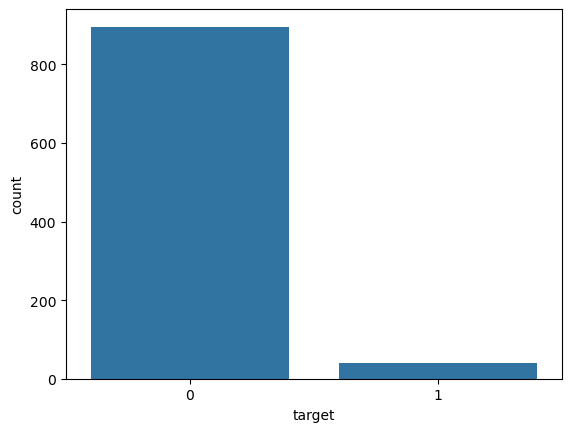

In [12]:
# from the data we can see the data is imbalance,.
sn.countplot(x=data['target'])
plt.show()

In [13]:
# split data into input and target
x=data.drop('target',axis=1)
y=data[['target']]

In [ ]:
smote=SMOTE(random_state=32)
x,y=smote.fit_resample(x,y)

In [15]:
x.shape

(1792, 49)

In [16]:
# after sample the target data ben balanced

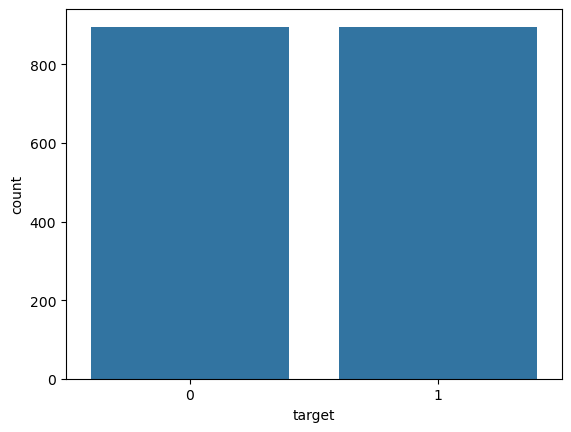

In [17]:
sn.countplot(x=y['target'])
plt.show()

In [18]:
# plot again the data secoorelation
cor=x.corr()
styled_corr = cor.style.background_gradient(cmap='Blues')
styled_corr

c:\Users\prane\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\prane\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
f_1,1.000000,-0.200809,0.138827,0.036636,0.074293,-0.251908,-0.003795,-0.148851,-0.344955,-0.157188,-0.359329,-0.193518,-0.209995,-0.212196,-0.043852,-0.205046,0.037916,0.025307,0.004814,-0.048928,-0.087446,-0.181550,nan,0.065322,-0.106275,0.292185,0.335422,-0.132294,-0.137501,0.218219,-0.084219,-0.064677,-0.011067,-0.063666,-0.285820,-0.274911,0.397045,-0.341356,-0.318163,-0.418533,-0.413097,-0.261666,-0.247685,-0.212223,-0.169848,-0.065738,-0.387138,0.152999,-0.139546
f_2,-0.200809,1.000000,0.133900,0.011316,-0.111763,0.946617,-0.225268,-0.030868,0.813935,0.177631,0.700986,0.015718,0.058408,0.245096,-0.190635,0.342619,0.205619,0.286443,0.067499,-0.116459,-0.125373,0.140837,nan,-0.199258,0.129360,-0.103172,0.007578,0.160614,0.248120,-0.231697,0.006293,0.176315,-0.010972,0.176137,0.881414,0.885762,-0.238260,0.487408,0.068283,0.051571,0.447532,0.688601,0.727591,0.624062,-0.127891,-0.059278,0.104416,-0.127722,0.154051
f_3,0.138827,0.133900,1.000000,0.284054,-0.074532,0.126062,-0.541628,-0.286100,0.222704,0.062062,0.047925,-0.149031,-0.027033,0.234837,-0.341344,0.397509,0.025859,-0.021362,0.652197,-0.250936,-0.121087,0.242583,nan,-0.585289,-0.033990,-0.079906,0.439807,-0.080028,0.074495,-0.328238,-0.013477,0.512590,-0.048180,0.513089,0.253071,0.253479,0.198460,0.356703,-0.281955,-0.146303,0.196484,0.184068,0.158096,0.162420,-0.076298,-0.130438,0.096162,0.092405,0.101776
f_4,0.036636,0.011316,0.284054,1.000000,0.081230,-0.069976,-0.474173,-0.337562,-0.103029,0.023110,-0.204617,0.032282,0.157753,0.206698,0.030633,0.203958,0.034567,-0.002064,0.279957,-0.048510,0.088107,0.642813,nan,-0.603999,0.548503,-0.418549,0.140660,0.057144,0.117479,-0.434873,-0.448507,0.643255,-0.043150,0.642800,0.000446,0.000878,0.356310,-0.025405,0.370359,0.383596,-0.322573,-0.158061,-0.127556,-0.186269,-0.266945,-0.132256,0.034758,-0.474078,0.480249
f_5,0.074293,-0.111763,-0.074532,0.081230,1.000000,-0.111520,0.166070,0.195421,-0.110279,0.088044,-0.177723,-0.026137,-0.053080,-0.093731,0.028289,-0.111438,0.014910,0.047850,-0.094583,0.105464,0.050436,0.005448,nan,0.119016,0.045797,-0.016221,-0.080320,0.039419,-0.034446,-0.010570,-0.035882,-0.061965,0.043302,-0.064356,-0.104368,-0.096881,0.064131,-0.022119,0.123399,0.118691,-0.082909,-0.107662,-0.102732,-0.095636,-0.018705,0.005473,-0.098236,-0.047781,0.030890
f_6,-0.251908,0.946617,0.126062,-0.069976,-0.111520,1.000000,-0.174909,0.037868,0.900148,0.196104,0.774202,0.002808,0.026790,0.230521,-0.226351,0.343147,0.253866,0.354644,0.079469,-0.131997,-0.146861,0.038474,nan,-0.130297,0.028966,-0.038667,0.021157,0.154191,0.222929,-0.174363,0.100026,0.091697,-0.013218,0.092075,0.901032,0.907468,-0.315938,0.561209,-0.006107,-0.008043,0.577815,0.814589,0.842933,0.740145,-0.110077,-0.057607,0.133665,-0.032347,0.064118
f_7,-0.003795,-0.225268,-0.541628,-0.474173,0.166070,-0.174909,1.000000,0.457818,-0.215783,-0.285654,-0.073570,-0.293115,-0.440365,-0.521011,-0.071413,-0.519015,-0.041097,0.006024,-0.145155,-0.068068,-0.263416,-0.619705,nan,0.900201,-0.569880,0.183042,-0.346414,-0.202263,-0.322819,0.692669,0.266006,-0.832676,0.086057,-0.833963,-0.283448,-0.276269,-0.305398,-0.279857,-0.162448,-0.081091,-0.061738,-0.113193,-0.117908,-0.052587,0.187331,0.105333,-0.165615,0.505370,-0.605814
f_8,-0.148851,-0.030868,-0.286100,-0.337562,0.195421,0.037868,0.457818,1.000000,0.084153,0.690214,0.213819,0.391839,0.234538,0.181132,0.273913,0.066766,-0.257149,-0.164939,-0.256758,0.523671,0.349039,-0.282176,nan,0.475515,-0.107794,-0.066055,-0.403440,0.285698,0.114762,0.084094,0.078746,-0.397756,0.060559,-0.399591,0.009413,0.010395,-0.376565,0.045312,0.174996,0.153822,0.212546,0.134798,0.087336,0.179605,-0.001128,-0.036144,-0.135805,0.055995,-0.074424
f_9,-0.344955,0.813935,0.222704,-0.103029,-0.110279,0.9

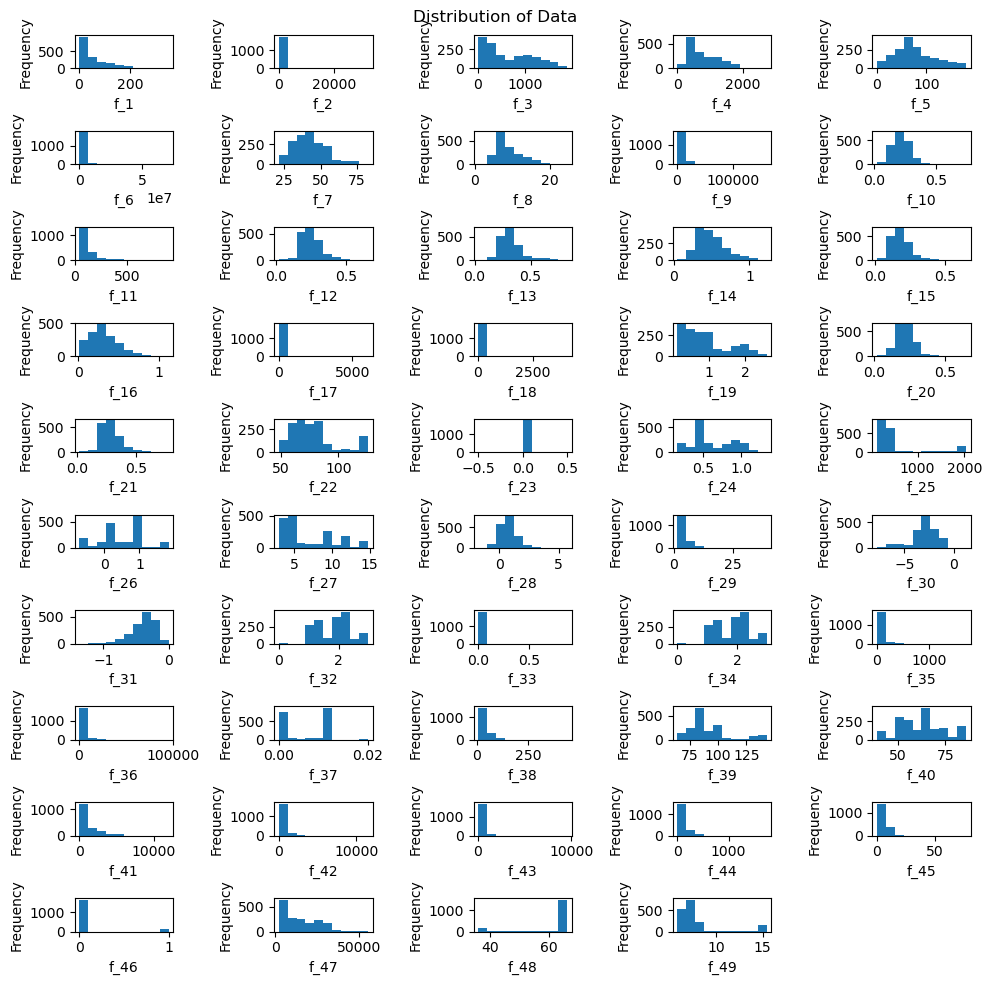

In [ ]:
# find distribution of data


plt.figure(figsize=(10, 10))
plt.suptitle('Distribution of Data')  # Use suptitle for the main title

for i, j in enumerate(x.columns):
    plt.subpalot(10, 5, i + 1)
    plt.hist(x[j])
    plt.xlabel(j)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



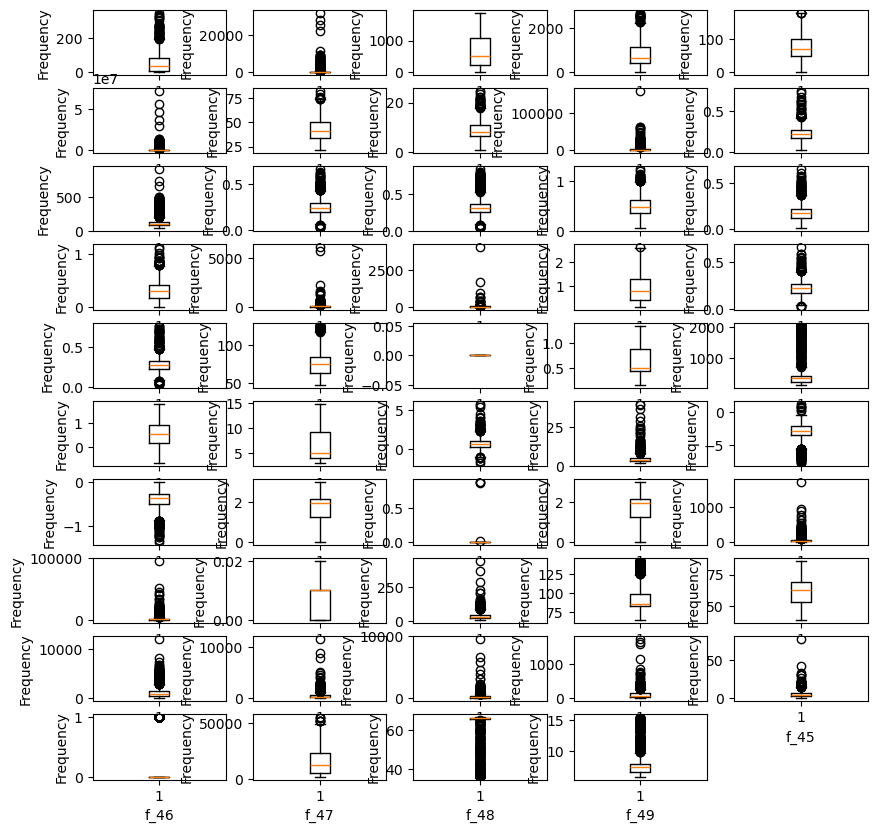

In [20]:
# CHECK OUTLAYERS IN DATA
plt.figure(figsize=(10, 10))

for i, j in enumerate(x.columns):
    plt.subplot(10, 5, i + 1)
    plt.boxplot(x[j])
    plt.xlabel(j)
    plt.ylabel('Frequency')


In [21]:
# remove outliers
from scipy.stats import zscore

for i in x.columns:
    score=zscore(x[i])
    ind=x.index[(score>3) | (score<-3)]
    mn=x[i].mean()
    x.loc[ind,i] = mn




C:\Users\prane\AppData\Local\Temp\ipykernel_4888\933019424.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '55.8984375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[ind,i] = mn
C:\Users\prane\AppData\Local\Temp\ipykernel_4888\933019424.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '452.55859375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[ind,i] = mn
C:\Users\prane\AppData\Local\Temp\ipykernel_4888\933019424.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1165290.556919643' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[ind,i] = mn
C:\Users\prane\AppData\Local\Temp\ipykernel_4888\933

In [22]:
import pandas as pd

train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')
xtrain=train.iloc[:,:-1].values
ytrain=train.iloc[:,-1].values
xtest=test.iloc[:,:-1].values
ytest=test.iloc[:,-1].values

In [23]:
#train test split of data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=32)

In [24]:
xtrain.shape

(1344, 49)

In [ ]:
# SCALE THE DATA
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [26]:
xtrain.shape

(1344, 49)

In [27]:
#save scaler
joblib.dump(scaler,'scalar.joblib')

['scalar.joblib']

In [28]:
# applay pca
pca=PCA(n_components=0.95)
pca_train=pca.fit_transform(xtrain)
pca_test=pca.transform(xtest)

In [29]:
# save pca
joblib.dump(pca,'pca.joblib')

['pca.joblib']

In [30]:
# model selection

In [31]:
# SVC with Grid search cv to find best model parameters

In [32]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],
}


model=SVC(probability=True)
g_s_model=GridSearchCV(model,param_grid,cv=5)
g_s_model.fit(pca_train,ytrain)

c:\Users\prane\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\prane\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\prane\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\prane\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [33]:
# get best model paramter
print('best paramter',g_s_model.best_params_)
print('best score',g_s_model.best_score_)

best paramter {'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
best score 0.9858625090162569


In [34]:
# measure matrics
test_p=g_s_model.predict(pca_test)
print('accuracy_score of svm',accuracy_score(ytest,test_p))
print('confusion_matrix \n',confusion_matrix(ytest,test_p))
print('classificatin report',classification_report(ytest,test_p))

accuracy_score of svm 0.9910714285714286
confusion_matrix 
 [[220   2]
 [  2 224]]
classificatin report               precision    recall  f1-score   support

           0       0.99      0.99      0.99       222
           1       0.99      0.99      0.99       226

    accuracy                           0.99       448
   macro avg       0.99      0.99      0.99       448
weighted avg       0.99      0.99      0.99       448



In [35]:
# random forest classfier with gridsearch

In [ ]:
aram_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
}
model=RandomForestClassifier()
g_r_model=GridSearchCV(model,aram_grid,cv=5)
g_r_model.fit(pca_train,ytrain)

c:\Users\prane\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\prane\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\prane\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\prane\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [ ]:
print('best paramter',g_r_model.best_params_)
print('best score',g_r_model.best_score_)

best paramter {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
best score 0.982880208622316


In [ ]:
test_p=g_r_model.predict(pca_test)
print('accuracy_score of svm',accuracy_score(ytest,test_p))
print('confusion_matrix \n',confusion_matrix(ytest,test_p))
print('classificatin report',classification_report(ytest,test_p))

accuracy_score of svm 0.9933035714285714
confusion_matrix 
 [[221   1]
 [  2 224]]
classificatin report               precision    recall  f1-score   support

           0       0.99      1.00      0.99       222
           1       1.00      0.99      0.99       226

    accuracy                           0.99       448
   macro avg       0.99      0.99      0.99       448
weighted avg       0.99      0.99      0.99       448



In [ ]:
# apply Xgboost
from xgboost import XGBClassifier

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1, 1, 10],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 1, 10]  # L2 regularization term on weights
}
model=XGBClassifier()
g_x_model=GridSearchCV(model,param_grid,cv=5)
g_x_model.fit(pca_train,ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1], 'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 1, 10],
                         'reg_lambda': [0, 0.1, 1, 10]})

In [ ]:
print('best paramter',g_x_model.best_params_)
print('best score',g_x_model.best_score_)

best paramter {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0.1}
best score 0.9799006824612995


In [ ]:
test_p=g_x_model.predict(pca_test)
print('accuracy_score of svm',accuracy_score(ytest,test_p))
print('confusion_matrix \n',confusion_matrix(ytest,test_p))
print('classificatin report',classification_report(ytest,test_p))

accuracy_score of svm 0.9776785714285714
confusion_matrix 
 [[214   8]
 [  2 224]]
classificatin report               precision    recall  f1-score   support

           0       0.99      0.96      0.98       222
           1       0.97      0.99      0.98       226

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



In [ ]:
# saving 3 models
joblib.dump(g_s_model,'svc.joblib')
joblib.dump(g_r_model,'random.joblib')
joblib.dump(g_x_model,'xgboost.joblib')

['xgboost.joblib']

In [ ]:
# prediction

In [ ]:
model=joblib.load('svc.joblib')
val=x[8:9]
p=pca.transform(val)
model.predict(p)


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator GridSearchCV from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
# apply k best method to find best features

In [ ]:
# mutual information calculation
from sklearn.feature_selection import mutual_info_classif

score=mutual_info_classif(xtrain,ytrain)
pd.Series(score).sort_values(ascending=False)

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19    0.505684
21    0.483571
25    0.476318
26    0.474315
24    0.472883
9     0.461785
20    0.446024
14    0.433355
47    0.431516
12    0.429205
11    0.419708
33    0.418607
31    0.417435
15    0.413294
23    0.402003
13    0.389259
35    0.375937
30    0.365145
46    0.363199
38    0.358569
39    0.335979
18    0.315915
41    0.243577
5     0.239250
2     0.218063
27    0.200571
0     0.198354
48    0.197860
40    0.164253
29    0.162406
8     0.149330
10    0.122066
3     0.120394
1     0.112001
36    0.103481
43    0.100836
28    0.095630
17    0.087445
37    0.085297
42    0.084628
44    0.071189
16    0.070963
4     0.069482
7     0.061560
34    0.054106
6     0.044810
22    0.017306
32    0.009280
45    0.000226
dtype: float64

<Axes: >

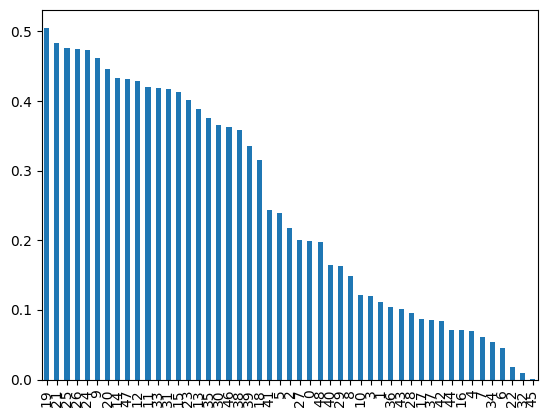

In [ ]:
# understand about features
pd.Series(score).sort_values(ascending=False).plot.bar()

In [ ]:

# apply k best
from sklearn.feature_selection import SelectKBest

select_c=SelectKBest(score_func=mutual_info_classif,k=10)
new=select_c.fit_transform(xtrain,ytrain)


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=32)

In [ ]:
x.columns[select_c.get_support()]

Index(['f_10', 'f_12', 'f_15', 'f_20', 'f_21', 'f_22', 'f_25', 'f_26', 'f_27',
       'f_48'],
      dtype='object')

In [ ]:
# getting important features
sxtrain = xtrain[['f_10', 'f_15', 'f_20', 'f_21', 'f_22', 'f_25', 'f_26', 'f_27', 'f_34', 'f_48']]
stest = xtest[['f_10', 'f_15', 'f_20', 'f_21', 'f_22', 'f_25', 'f_26', 'f_27', 'f_34', 'f_48']]


In [ ]:
# appaly scale on new data
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(sxtrain)
xtest=scaler.transform(stest)

In [ ]:
#save

joblib.dump(scaler,'scalar.joblib')

['scalar.joblib']

In [ ]:
# apply models
svc=SVC(C=100, degree=2, gamma=1, kernel='rbf',probability=True)
svc.fit(xtrain,ytrain)

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, degree=2, gamma=1, probability=True)

In [ ]:
# check accuracy measues
test_p=svc.predict(xtest)
print('accuracy_score of svm',accuracy_score(ytest,test_p))
print('confusion_matrix \n',confusion_matrix(ytest,test_p))
print('classificatin report \n',classification_report(ytest,test_p))

accuracy_score of svm 0.9575892857142857
confusion_matrix 
 [[213   9]
 [ 10 216]]
classificatin report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       222
           1       0.96      0.96      0.96       226

    accuracy                           0.96       448
   macro avg       0.96      0.96      0.96       448
weighted avg       0.96      0.96      0.96       448



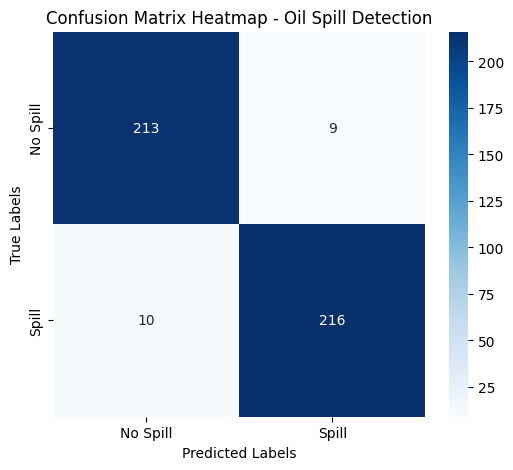

In [ ]:
# head map

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(ytest,test_p)

# Define class labels
class_labels = ["No Spill", "Spill"]

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Labels, title, and formatting
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap - Oil Spill Detection")
plt.show()


In [ ]:
# random forest

rft=RandomForestClassifier(max_depth= 30, min_samples_leaf=1, min_samples_split= 2, n_estimators= 300)
rft.fit(xtrain,ytrain)

c:\Program Files\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=30, n_estimators=300)

In [ ]:
# check model perfomance
test_p=rft.predict(xtest)
print('accuracy_score of svm',accuracy_score(ytest,test_p))
print('confusion_matrix \n',confusion_matrix(ytest,test_p))
print('classificatin report \n ',classification_report(ytest,test_p))

accuracy_score of svm 0.9709821428571429
confusion_matrix 
 [[217   5]
 [  8 218]]
classificatin report 
                precision    recall  f1-score   support

           0       0.96      0.98      0.97       222
           1       0.98      0.96      0.97       226

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



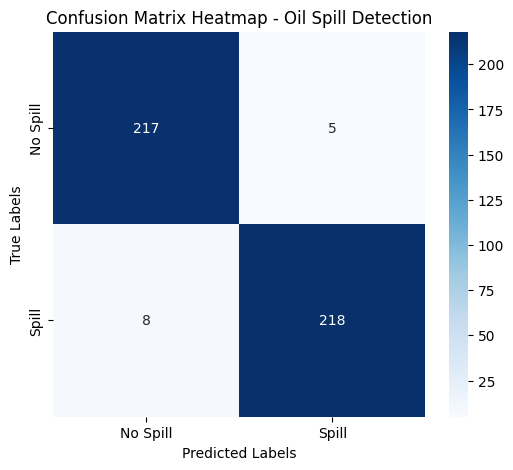

In [ ]:
 #head map

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(ytest,test_p)

# Define class labels
class_labels = ["No Spill", "Spill"]

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Labels, title, and formatting
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap - Oil Spill Detection")
plt.show()

In [ ]:
#xgboost

In [ ]:
xgbost=XGBClassifier(gamma= 0, learning_rate=0.1, max_depth= 5, n_estimators=300, reg_alpha= 0.1, reg_lambda= 0.1)
xgbost.fit(xtrain,ytrain)
test_p=xgbost.predict(xtest)

In [ ]:
# check accuracy measures
test_p=xgbost.predict(xtest)
print('accuracy_score of svm',accuracy_score(ytest,test_p))
print('confusion_matrix \n',confusion_matrix(ytest,test_p))
print('classificatin report \n',classification_report(ytest,test_p))

accuracy_score of svm 0.9776785714285714
confusion_matrix 
 [[218   4]
 [  6 220]]
classificatin report 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       222
           1       0.98      0.97      0.98       226

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



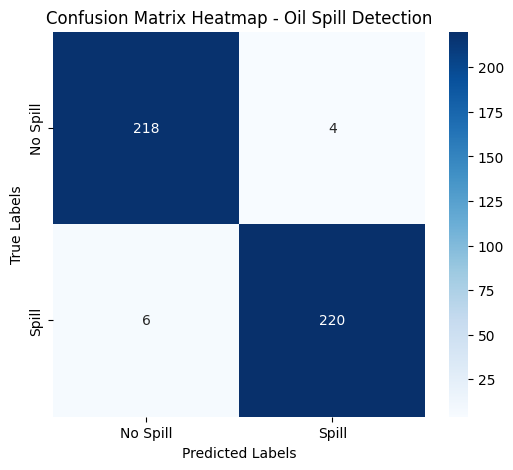

In [ ]:
 #head map

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(ytest,test_p)

# Define class labels
class_labels = ["No Spill", "Spill"]

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Labels, title, and formatting
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap - Oil Spill Detection")
plt.show()

In [ ]:
# saving models

joblib.dump(svc,'svc.joblib')
joblib.dump(rft,'random.joblib')
joblib.dump(xgbost,'xgboost.joblib')

['xgboost.joblib']

In [ ]:
# doing prediction

In [ ]:
# PREDICT
import joblib
sc=joblib.load('scalar.joblib')
sv=joblib.load('svc.joblib')
rf=joblib.load('random.joblib')
xg=joblib.load('xgboost.joblib')
val=[[0.22,0.13,0.2,0.22,69.09,239.69,0.18,3.83,1.22,66.11]]
val=sc.transform(val)
pred=rf.predict(val)

if pred>0.5:
    print('oil spill detected')
else:
    print('no spill detected')






c:\Program Files\Python310\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breakin

no spill detected


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
cs=joblib.load('scalar.joblib')
rf=joblib.load('random.joblib')
val=[[0.19,0.1,0.16,0.2,87.65,132.78,-0.01,3.78,2.19,65.74]]
val=sc.transform(val)
pred=rf.predict(val)

if pred>0.5:
    print('oil spill detected')
else:
    print('no spill detected')

c:\Program Files\Python310\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


oil spill detected


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
Minimum values
f_10: 0.02
f_15: 0.01
f_20: 0.02
f_21: 0.02
f_22: 47.66
f_25: 132.78
f_26: -0.71
f_27: 2.96
f_34: 0.00
f_48: 35.95
Maximum Values:
f_10: 0.74
f_15: 0.65
f_20: 0.65
f_21: 0.77
f_22: 126.08
f_25: 2036.80
f_26: 1.83
f_27: 14.78
f_34: 2.98
f_48: 66.45